<a href="https://github.com/victoresende19">![Foo](https://www.jornaldevinhedo.com.br/wp-content/uploads/2022/07/1e45483b-4bba-4b0c-b885-de7715cf8afd.jpeg)</a>

<h2 style="text-align:center">Processamento de Linguagem Natural: Plano de Governo Ciro Gomes (PDT) <h2\>
<p style="text-align:center;font-size:13px;"></p>
   
<h2 style="text-align:center">Victor Augusto Souza Resende<h2\>
<p style="text-align:center;font-size:13px;">Autor</p>

## Sumário

- [1. Contexto](#1) <br>
    
- [2. Instaçaões e Bibliotecas](#2) <br>
    
- [3. Leitura do arquivo PDF](#3) <br>
    
- [4. Exploração do PDF](#4) <br>
    
- [5. Junção de todo contéudo](#5) <br>
    
- [6. Pipeline](#6) <br>
    * [6.1 - Lower case](#61)<br>
    * [6.2 - Retirar pontuação](#62)<br>
    * [6.3 - Tokenização](#63)<br>
    * [6.4 - Stop words](#64)<br>
        
- [7. Gráficos](#7) <br>
    * [7.1 - Gráfico de frequência dos tokens limpos ](#7)<br>
    * [7.2 - Nuvem de palavras](#7)<br>

## Contexto  <a id="1"></a>

A análise a seguir tem como objetivo aplicar técnicas de Processamento de Linguagem Natural sobre o plano de governo disponibilizado pelos candidatos da eleição presidencial do Brasil em 2022. 

Portanto, o notebook utilizou os dados referentes ao texto disponibilizado pelo candidato Ciro Gomes do partido PDT, do qual pode ser visualizado clicando <a href="https://static.poder360.com.br/2022/08/plano-ciro-tse-compactado_1.pdf">aqui</a>.

## Instações e bibliotecas  <a id="2"></a>

In [1]:
!pip install pdfplumber -q
!pip install wordcloud -q
!pip install Pillow -q

In [2]:
import pdfplumber
import re
import nltk
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Leitura do arquivo PDF <a id="3"></a>

In [3]:
mdb = 'PlanosPDF/PLANOPDT.pdf'

In [4]:
pdf = pdfplumber.open(mdb)

## Exploração do PDF <a id="4"></a>

In [5]:
# Metadados
pdf.metadata

{'Author': 'limal',
 'CreationDate': "D:20220808101230-03'00'",
 'ModDate': 'D:20220809155811Z',
 'Producer': 'Acrobat Pro DC 21 Paper Capture Plug-in',
 'Title': 'Programa de Governo de Ciro Gomes 2022_compressed_compressed12.pdf'}

In [6]:
# Quantidade de páginas
len(pdf.pages)

26

In [7]:
# Página 1
pdf.pages[0].extract_text()

'PDT \nLINHASG ERAIDS O \n\'  " \nDOP  DTIA   PRESIDENCIA \n, \nDAR  EPUBLICEAM 2  022. '

In [8]:
# Página 3
print(pdf.pages[4].extract_text())

PROGRAMA  DE  GOVERNO  DE  CIRO  GOMES  2  O 2  2 
O Brasilq  ue 
queremos 
Queremos  que o Brasil alcance  indicadores  de desenvolvimento  semelhantes  aos que 
Portugal  apresentava  em 2020, os quais lhe posicionaram  como o 38º país do mundo  no 
ranking  de "muito  elevado  desenvolvimento  humano  - o Brasil, segundo  os dados  mais 
recentes,  ocupa  a 84ª posição. 
Para isso, o PND propõe: 
Investir em ciência  e desenvolvimento  tecnológico; 
Aumentar  a quantidade  e a qualidade  dos empregos,  reduzindo  a informalidade; 
Melhorar os serviços  de saúde; 
Reduzir a pobreza e as desigualdades  sociais  - de renda, gênero e raça; 
Oferecer mais segurança  visando  reduzir os índices de criminalidade; 
Ampliar  o acesso  a serviços  básicos  como  água  limpa  e tratada,  saneamento, 
transporte,  moradia  e iluminação,  e também  à cultura  e ao lazer; 
Expandir o acesso  à comunicação; 
Garantir  o acesso  e respeito  aos direitos  humanos  a todos  e especialmente  às 
minor

## Junção de todo contéudo <a id="5"></a>
Essa etapa juntará todo o texto extraído em uma única string.



In [9]:
conteudo = ''
for pagina in pdf.pages:
    conteudo = conteudo + pagina.extract_text()

# cinco primeiros
print(conteudo[0:5])

PDT 



## Pipeline: <a id="6"></a>

1.   Lower case
2.   Retirar pontuação
3.   Tokenização
4.   Stop words


### 1 - Lower case <a id="61"></a>

In [10]:
conteudo = conteudo.lower()
print(conteudo)

pdt 
linhasg eraids o 
'  " 
dop  dtia   presidencia 
, 
dar  epubliceam 2  022. pdt 
aqui, apresentamos  as principais  diretrizes 
do  projeto  nacional  de  desenvolvimento 
que ciro gomes está apresentando  à socie 
dade  brasileira.  a  partir  dessa  consulta, 
será  elaborado  o  programa  de  governo 
definitivo  com o qual ciro pretende  escrever 
uma nova história  para o brasil. 
prefir 
iro12 
presidente programa  de  governo  de  ciro  gomes  2  o 2  2 
o brasilp  arou 
de  crescer 
o brasil vive um dos momentos  mais graves de sua história. além das ameaças  constantes 
à sua democracia,  o país convive há mais de uma década  com uma economia  absoluta 
mente estagnada  que está fazendo com que a fome e a miséria voltem a ser um problema 
crônico - isso no país que é o segundo maior produtor de alimentos  do mundo. 
hoje, mais  de  31 milhões  de  brasileiros  passam  fome;  125 milhões  não  fazem  as três 
refeições  diárias;  104 milhões  vivem  só com 14 reais por dia

### 2 - Retirar pontuação <a id="62"></a>

In [11]:
# Retirando caracteres especiais
conteudo = re.sub(r'[^\w\s]+', ' ', conteudo)

# Retirando "número_" pois ocorre demasiadamente
conteudo = re.sub(r'\d+_', ' ', conteudo)

print(conteudo)

pdt 
linhasg eraids o 
     
dop  dtia   presidencia 
  
dar  epubliceam 2  022  pdt 
aqui  apresentamos  as principais  diretrizes 
do  projeto  nacional  de  desenvolvimento 
que ciro gomes está apresentando  à socie 
dade  brasileira   a  partir  dessa  consulta  
será  elaborado  o  programa  de  governo 
definitivo  com o qual ciro pretende  escrever 
uma nova história  para o brasil  
prefir 
iro12 
presidente programa  de  governo  de  ciro  gomes  2  o 2  2 
o brasilp  arou 
de  crescer 
o brasil vive um dos momentos  mais graves de sua história  além das ameaças  constantes 
à sua democracia   o país convive há mais de uma década  com uma economia  absoluta 
mente estagnada  que está fazendo com que a fome e a miséria voltem a ser um problema 
crônico   isso no país que é o segundo maior produtor de alimentos  do mundo  
hoje  mais  de  31 milhões  de  brasileiros  passam  fome   125 milhões  não  fazem  as três 
refeições  diárias   104 milhões  vivem  só com 14 reais por dia

### 3 - Tokenização <a id="63"></a>


In [12]:
conteudo = re.findall(r'\w+', conteudo)

# cinco primeiros
print(conteudo[0:5])

['pdt', 'linhasg', 'eraids', 'o', 'dop']


### 4 - Stop words <a id="64"></a>


In [13]:
stopwords = nltk.corpus.stopwords.words('portuguese')
conteudo_limpo = []

for item in conteudo:
    if (item not in stopwords) and (len(item) > 1):
        conteudo_limpo.append(item)

# cinco primeiros
print(conteudo_limpo[0:5])

['pdt', 'linhasg', 'eraids', 'dop', 'dtia']


In [14]:
# Após a limpeza, os 30 tokens mais comuns

stats_tokens_limpos = Counter(conteudo_limpo)
conteudo_30 = stats_tokens_limpos.most_common(30)
conteudo_30

[('governo', 42),
 ('programa', 41),
 ('ciro', 30),
 ('gomes', 28),
 ('país', 25),
 ('desenvolvimento', 20),
 ('nacional', 18),
 ('pública', 17),
 ('deverá', 17),
 ('população', 17),
 ('segurança', 16),
 ('acesso', 16),
 ('brasil', 15),
 ('saúde', 15),
 ('forma', 14),
 ('vamos', 14),
 ('bem', 14),
 ('políticas', 13),
 ('2022', 13),
 ('relação', 13),
 ('renda', 12),
 ('cultura', 12),
 ('educação', 12),
 ('públicas', 12),
 ('qualidade', 11),
 ('medidas', 11),
 ('social', 11),
 ('incluindo', 11),
 ('deverão', 11),
 ('deve', 11)]

## Gráficos <a id="7"></a>

1.   Gráfico de frequência dos tokens limpos
2.   Nuvem de palavras

In [15]:
df = pd.DataFrame(conteudo_30, columns = ['Palavra', 'Frequencia'])
df.head()

,Palavra,Frequencia
0,governo,42
1,programa,41
2,ciro,30
3,gomes,28
4,país,25


### 1 - Gráfico de frequência dos tokens limpos <a id="71"></a>

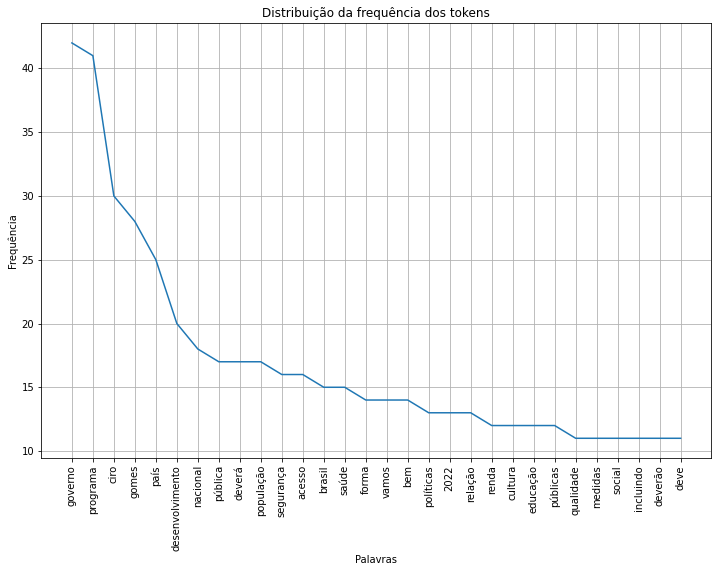

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.Palavra, df.Frequencia)

ax.set(xlabel='Palavras', ylabel='Frequência', title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

### 2 - Nuvem de palavras <a id="72"></a>

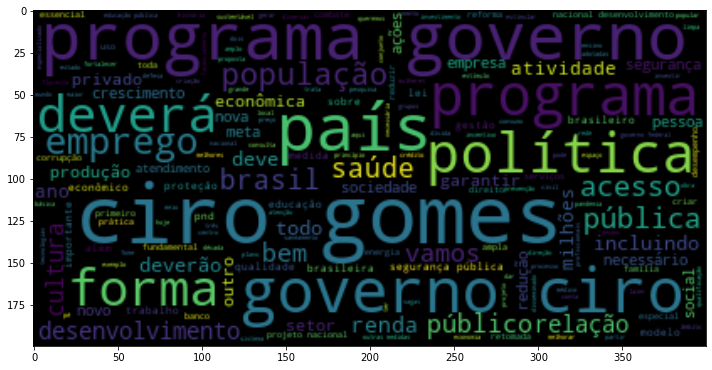

In [17]:
# concatenar os tokens limpos 
tokens_juntos = " ".join(s for s in conteudo_limpo)
wordcloud = WordCloud(background_color="black").generate(tokens_juntos)

# nuvem de palavras
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Victor Resende™ <br>
Outubro, 2022